In [ ]:
from google.colab import drive
import os

# Mount Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

!pip install mediapipe==0.10.21


!pip install --no-deps \
  opencv-python \
  tensorflow \
  pandas==2.2.2 \
  scikit-learn \
  huggingface_hub<1.0 \
  tqdm

In [ ]:
# =========================
# DATASET LOADING & UNZIP
# =========================

import os
import tarfile
import zipfile
from google.colab import drive

# --- Ensure Drive is mounted ---
if not os.path.exists("/content/drive"):
    drive.mount("/content/drive")

# =========================
# PATH DEFINITIONS
# =========================

# Drive locations (SOURCE)
STATIC_TAR = "/content/drive/MyDrive/SIGN2SOUND_DUAL_HEAD/STATIC_DATASET/Augmented_ASL_Dataset.tar"
WORD_ZIP   = "/content/drive/MyDrive/SIGN2SOUND_DUAL_HEAD/VIDEO_DATASET/WORD_DATASET_37.zip"

# Local extraction locations (TARGET)
STATIC_EXTRACT = "/content/static_dataset"
WORD_EXTRACT   = "/content/word_dataset"

os.makedirs(STATIC_EXTRACT, exist_ok=True)
os.makedirs(WORD_EXTRACT, exist_ok=True)

# =========================
# EXTRACT STATIC DATASET (.tar)
# =========================

if not os.listdir(STATIC_EXTRACT):
    print("Extracting static dataset (TAR)...")
    with tarfile.open(STATIC_TAR, "r") as tar:
        tar.extractall(STATIC_EXTRACT)
    print("Static dataset extracted.")
else:
    print("Static dataset already extracted. Skipping.")

# =========================
# EXTRACT WORD DATASET (.zip)
# =========================

if not os.listdir(WORD_EXTRACT):
    print("Extracting word video dataset (ZIP)...")
    with zipfile.ZipFile(WORD_ZIP, "r") as zipf:
        zipf.extractall(WORD_EXTRACT)
    print("Word dataset extracted.")
else:
    print("Word dataset already extracted. Skipping.")

# =========================
# FINAL PATHS (USE THESE)
# =========================

STATIC_ROOT = STATIC_EXTRACT
WORD_ROOT   = WORD_EXTRACT

print("\nDataset setup complete.")
print("STATIC_ROOT:", STATIC_ROOT)
print("WORD_ROOT  :", WORD_ROOT)


Extracting static dataset (TAR)...


/tmp/ipython-input-1479703573.py:36: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(STATIC_EXTRACT)


Static dataset extracted.
Extracting word video dataset (ZIP)...
Word dataset extracted.

Dataset setup complete.
STATIC_ROOT: /content/static_dataset
WORD_ROOT  : /content/word_dataset


In [6]:
import mediapipe as mp
import cv2
import numpy as np
import os
import glob
from tqdm import tqdm

# ================= CONFIGURATION =================
INPUT_ROOT = "/content/static_dataset/Augmented Data"
OUTPUT_DIR = "/content/drive/MyDrive/Sign2Sound_Hybrid/datasets/alphabet_landmarks_static"

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Mediapipe Setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,  # Essential for static images
    max_num_hands=1,
    min_detection_confidence=0.5
)

# Target Letters (A-Y, excluding J, Z)
LETTERS = list("ABCDEFGHIKLMNOPQRSTUVWXY")

# Specific subfolders to use (Fair & Dark skin datasets)
TARGET_SUBFOLDERS = [
    "Train Data 1",  # Fair skin
    "Train Data 2"   # Dark skin
]

# ================= EXTRACTION FUNCTION =================
def extract_landmarks():
    print(f"Searching in: {INPUT_ROOT}")
    print(f"Target subfolders: {TARGET_SUBFOLDERS}")

    for letter in LETTERS:
        print(f"\nProcessing Letter: {letter}")
        all_landmarks_for_letter = []

        # Iterate through both Train Data 1 and Train Data 2
        for subfolder in TARGET_SUBFOLDERS:
            folder_path = os.path.join(INPUT_ROOT, subfolder, letter)

            if not os.path.exists(folder_path):
                print(f"Folder not found: {subfolder}/{letter}")
                continue

            # Get images
            images = glob.glob(os.path.join(folder_path, "*"))
            valid_images = [f for f in images if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

            print(f"   found {len(valid_images)} images in {subfolder}...")

            # Process images
            for img_path in tqdm(valid_images, desc=f"   Extracting {subfolder}/{letter}", leave=False):
                try:
                    image = cv2.imread(img_path)
                    if image is None:
                        continue

                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    results = hands.process(image_rgb)

                    if results.multi_hand_landmarks:
                        lm_list = []
                        for lm in results.multi_hand_landmarks[0].landmark:
                            lm_list.extend([lm.x, lm.y, lm.z])

                        all_landmarks_for_letter.append(lm_list)

                except Exception as e:
                    continue

        # Save accumulated landmarks for this letter
        if all_landmarks_for_letter:
            npy_path = os.path.join(OUTPUT_DIR, f"{letter}.npy")
            np_data = np.array(all_landmarks_for_letter, dtype=np.float32)
            np.save(npy_path, np_data)
            print(f"Saved {letter}.npy: {np_data.shape} samples")
        else:
            print(f"No landmarks found for {letter} in any folder")

# ================= RUN =================
extract_landmarks()
hands.close()
print("\nExtraction Done")


Searching in: /content/static_dataset/Augmented Data
Target subfolders: ['Train Data 1', 'Train Data 2']

Processing Letter: A
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved A.npy: (1383, 63) samples

Processing Letter: B
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved B.npy: (2748, 63) samples

Processing Letter: C
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved C.npy: (1578, 63) samples

Processing Letter: D
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved D.npy: (2922, 63) samples

Processing Letter: E
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved E.npy: (2742, 63) samples

Processing Letter: F
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved F.npy: (2844, 63) samples

Processing Letter: G
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved G.npy: (2490, 63) samples

Processing Letter: H
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved H.npy: (2778, 63) samples

Processing Letter: I
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved I.npy: (2976, 63) samples

Processing Letter: K
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved K.npy: (2820, 63) samples

Processing Letter: L
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved L.npy: (2508, 63) samples

Processing Letter: M
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved M.npy: (2352, 63) samples

Processing Letter: N
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved N.npy: (2406, 63) samples

Processing Letter: O
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved O.npy: (1908, 63) samples

Processing Letter: P
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved P.npy: (1932, 63) samples

Processing Letter: Q
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved Q.npy: (1554, 63) samples

Processing Letter: R
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved R.npy: (2562, 63) samples

Processing Letter: S
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved S.npy: (2304, 63) samples

Processing Letter: T
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved T.npy: (2688, 63) samples

Processing Letter: U
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved U.npy: (2796, 63) samples

Processing Letter: V
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved V.npy: (2688, 63) samples

Processing Letter: W
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved W.npy: (2760, 63) samples

Processing Letter: X
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved X.npy: (2952, 63) samples

Processing Letter: Y
   found 1500 images in Train Data 1...


   found 1500 images in Train Data 2...


Saved Y.npy: (2208, 63) samples

Extraction Done


In [9]:
!rsync -a /content/drive/MyDrive/Sign2Sound_Hybrid/datasets/alphabet_landmarks_static/ \
        /content/alphabet_landmarks_static/


In [10]:
import numpy as np
import os
import glob
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ================= CONFIGURATION =================
DATA_DIR = "/content/alphabet_landmarks_static"
DRIVE_MODEL_DIR = "/content/drive/MyDrive/Sign2Sound_Hybrid/models/alphabet/pose_mlp_v2"
os.makedirs(DRIVE_MODEL_DIR, exist_ok=True)

LETTERS = list("ABCDEFGHIKLMNOPQRSTUVWXY")  # 24 classes

# ================= FEATURE ENGINEERING =================
# This matches the "Alphabet Pose Model v2" plan
TIP_IDXS = [4, 8, 12, 16, 20]

def angle(a, b, c, eps=1e-8):
    """Calculate angle at point b given points a, b, c"""
    ba = a - b
    bc = c - b
    ba_n = ba / (np.linalg.norm(ba) + eps)
    bc_n = bc / (np.linalg.norm(bc) + eps)
    cosang = np.clip(np.dot(ba_n, bc_n), -1.0, 1.0)
    return np.arccos(cosang)

def featurize_pose(x63):
    """
    Convert 63 raw xyz coords -> 81 geometry features
    (Normalized coords + palm normal + tip distances + inter-tip dists + angles)
    """
    # Reshape to (21, 3)
    pts = x63.reshape(21, 3).copy()

    # 1. Wrist Normalization (origin at wrist)
    wrist = pts[0].copy()
    pts -= wrist

    # 2. Scale Normalization (by palm size)
    scale = np.linalg.norm(pts[9]) + 1e-6 # dist to middle_mcp
    pts /= scale

    # 3. Palm Normal (Orientation)
    v1 = pts[5]  # index_mcp
    v2 = pts[17] # pinky_mcp
    normal = np.cross(v1, v2)
    normal /= (np.linalg.norm(normal) + 1e-6)

    # 4. Fingertip Distances from Wrist
    tip_d = [np.linalg.norm(pts[i]) for i in TIP_IDXS]

    # 5. Inter-Fingertip Distances (Spread)
    tips = [pts[i] for i in [8, 12, 16, 20]]
    inter = []
    for i in range(len(tips)):
        for j in range(i+1, len(tips)):
            inter.append(np.linalg.norm(tips[i] - tips[j]))

    # 6. Joint Angles (MCP-PIP-DIP) for curling check
    angs = []
    for (a,b,c) in [(5,6,7), (9,10,11), (13,14,15), (17,18,19)]:
        angs.append(angle(pts[a], pts[b], pts[c]))

    # Flatten normalized coords
    coords = pts.reshape(-1)

    # Combine all features (63 + 3 + 5 + 6 + 4 = 81 dims)
    feat = np.concatenate([
        coords,
        normal,
        np.array(tip_d),
        np.array(inter),
        np.array(angs)
    ]).astype(np.float32)

    return feat

print("Feature extraction function ready.")


Feature extraction function ready.


In [11]:
# ================= LOAD & PROCESS DATA =================
X_list = []
y_list = []

print("Loading data...")
for idx, letter in enumerate(LETTERS):
    npy_path = os.path.join(DATA_DIR, f"{letter}.npy")

    if not os.path.exists(npy_path):
        print(f"Missing file: {npy_path}")
        continue

    # Load raw landmarks (N, 63)
    raw_data = np.load(npy_path)

    # Handle shape variations just in case
    if raw_data.ndim == 3: # (N, 1, 63) or (N, 30, 63)
        raw_data = raw_data[:, 0, :]

    print(f"  {letter}: {raw_data.shape[0]} samples")

    # Apply feature engineering to every sample
    features = np.array([featurize_pose(x) for x in raw_data])

    X_list.append(features)
    y_list.append(np.full(len(features), idx))

# Concatenate all
X = np.concatenate(X_list, axis=0)
y = np.concatenate(y_list, axis=0)

print(f"\n Total Data Shape: {X.shape}")
print(f"Features per sample: {X.shape[1]} (should be 81)")

# Train/Val Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"   Train: {X_train.shape[0]}, Val: {X_val.shape[0]}")


Loading data...
  A: 1383 samples
  B: 2748 samples
  C: 1578 samples
  D: 2922 samples
  E: 2742 samples
  F: 2844 samples
  G: 2490 samples
  H: 2778 samples
  I: 2976 samples
  K: 2820 samples
  L: 2508 samples
  M: 2352 samples
  N: 2406 samples
  O: 1908 samples
  P: 1932 samples
  Q: 1554 samples
  R: 2562 samples
  S: 2304 samples
  T: 2688 samples
  U: 2796 samples
  V: 2688 samples
  W: 2760 samples
  X: 2952 samples
  Y: 2208 samples

 Total Data Shape: (58899, 81)
Features per sample: 81 (should be 81)
   Train: 47119, Val: 11780


In [12]:
from sklearn.utils.class_weight import compute_class_weight

# ================= CLASS WEIGHTING =================
# Calculate weights to balance the loss function
unique_classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=unique_classes,
    y=y_train
)

# Explicitly map class index to weight
class_weight_dict = {
    int(cls): float(w) for cls, w in zip(unique_classes, class_weights)
}

print("Class Weights calculated:")
print(f"  Min weight: {min(class_weights):.4f}")
print(f"  Max weight: {max(class_weights):.4f}")

# ================= MODEL DEFINITION =================
def build_pose_mlp(input_dim, num_classes):
    inputs = keras.Input(shape=(input_dim,))

    # Layer 1: Wide enough to capture geometry combinations
    x = layers.Dense(256, activation="relu")(inputs)
    x = layers.Dropout(0.3)(x)

    # Layer 2: Bottleneck for stable features
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs, name="alphabet_pose_mlp")
    return model

model = build_pose_mlp(input_dim=X.shape[1], num_classes=len(LETTERS))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
]

# ================= TRAIN =================
print("Starting training...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)


Class Weights calculated:
  Min weight: 0.8246
  Max weight: 1.7735
Starting training...
Epoch 1/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6153 - loss: 1.3035 - val_accuracy: 0.9522 - val_loss: 0.1895 - learning_rate: 0.0010
Epoch 2/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9331 - loss: 0.2398 - val_accuracy: 0.9634 - val_loss: 0.1135 - learning_rate: 0.0010
Epoch 3/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9531 - loss: 0.1497 - val_accuracy: 0.9707 - val_loss: 0.0824 - learning_rate: 0.0010
Epoch 4/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9606 - loss: 0.1137 - val_accuracy: 0.9733 - val_loss: 0.0678 - learning_rate: 0.0010
Epoch 5/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9659 - loss: 0.0937 - val_accuracy: 0.9743 - val_loss: 0.0541 - learning_rate: 0.0010
Epoch 6/50
737/737 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9672 - loss: 0.0848 - val_accuracy: 0.9759 - val_loss: 0.0509 - learning_rate: 0.0010

In [13]:
DRIVE_MODEL_DIR = "/content/drive/MyDrive/sign2sound/models/alphabet/pose_mlp_v2"
os.makedirs(DRIVE_MODEL_DIR, exist_ok=True)


In [14]:
# ================= SAVE ARTIFACTS =================
# 1. Save Model
model_path = os.path.join(DRIVE_MODEL_DIR, "alphabet_pose_mlp_24letters.keras")
model.save(model_path)

# 2. Save Labels
labels_path = os.path.join(DRIVE_MODEL_DIR, "alphabet_labels_24letters.npy")
np.save(labels_path, LETTERS)

# 3. Save Feature Spec
spec = {
    "version": "pose_mlp_v2",
    "feature_dim": 81,
    "description": "norm_coords(63) + normal(3) + tips(5) + inter_tips(6) + angles(4)"
}
with open(os.path.join(DRIVE_MODEL_DIR, "pose_feature_spec.json"), "w") as f:
    json.dump(spec, f, indent=4)

# 4. Save Stats
stats_path = os.path.join(DRIVE_MODEL_DIR, "training_stats.npy")
final_stats = [
    history.history['accuracy'][-1],
    history.history['val_accuracy'][-1],
    history.history['loss'][-1],
    history.history['val_loss'][-1]
]
np.save(stats_path, final_stats)

print(f"\nAll artifacts saved to: {DRIVE_MODEL_DIR}")
print(f"   - Model: {os.path.basename(model_path)}")
print(f"   - Labels: {os.path.basename(labels_path)}")
print(f"   - Spec: pose_feature_spec.json")

# Quick Sanity Check
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\nFinal Validation Accuracy: {val_acc*100:.2f}%")



All artifacts saved to: /content/drive/MyDrive/sign2sound/models/alphabet/pose_mlp_v2
   - Model: alphabet_pose_mlp_24letters.keras
   - Labels: alphabet_labels_24letters.npy
   - Spec: pose_feature_spec.json

Final Validation Accuracy: 98.29%


369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       276
           B       0.99      1.00      1.00       550
           C       1.00      1.00      1.00       316
           D       1.00      1.00      1.00       584
           E       1.00      1.00      1.00       548
           F       1.00      0.99      1.00       569
           G       1.00      1.00      1.00       498
           H       1.00      1.00      1.00       556
           I       1.00      1.00      1.00       595
           K       1.00      1.00      1.00       564
           L       1.00      1.00      1.00       502
           M       0.73      0.91      0.81       470
           N       0.89      0.68      0.77       481
           O       1.00      1.00      1.00       382
           P       1.00      1.00      1.00       386
           Q       1.00      1.00      1.00       311
           R    

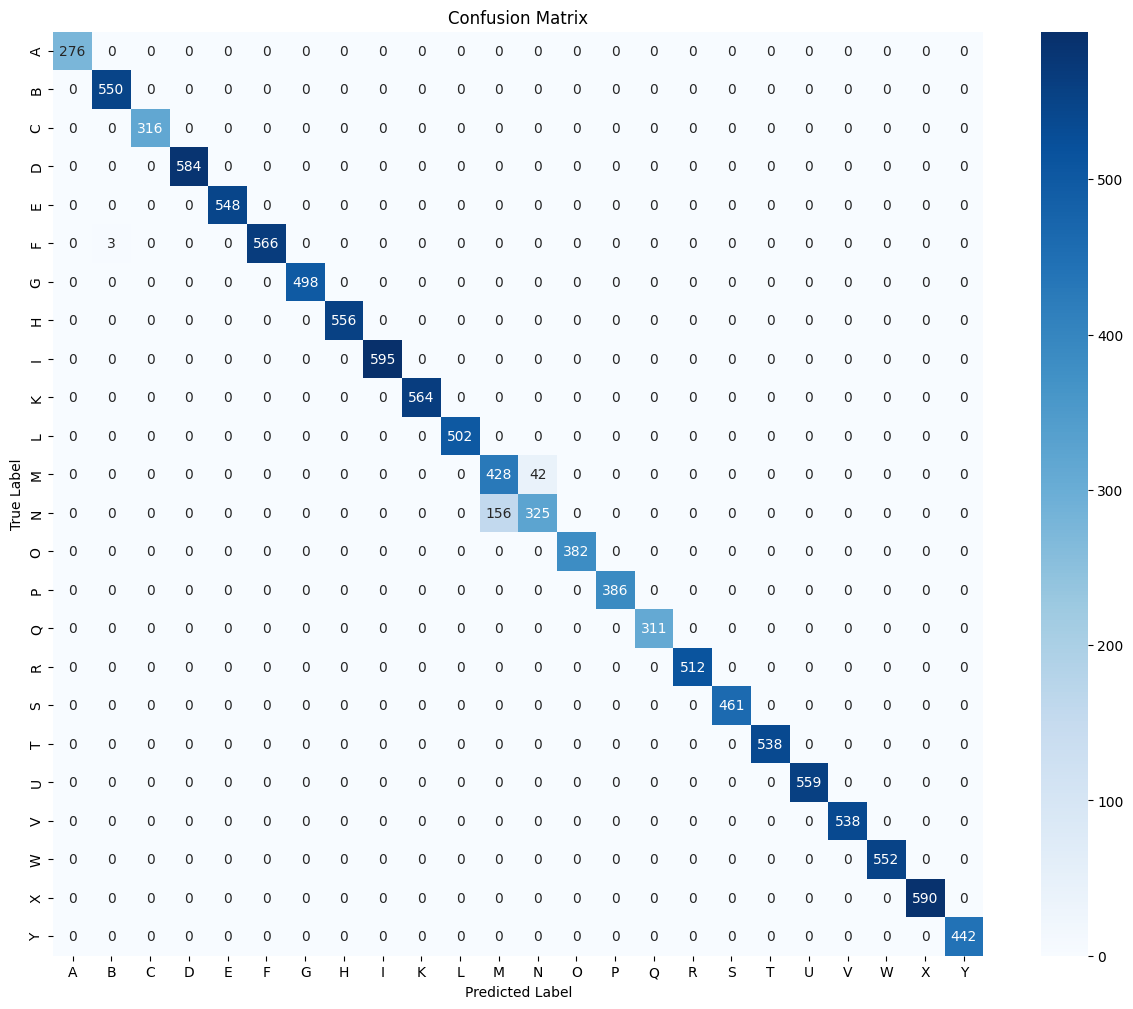

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=LETTERS))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LETTERS, yticklabels=LETTERS)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

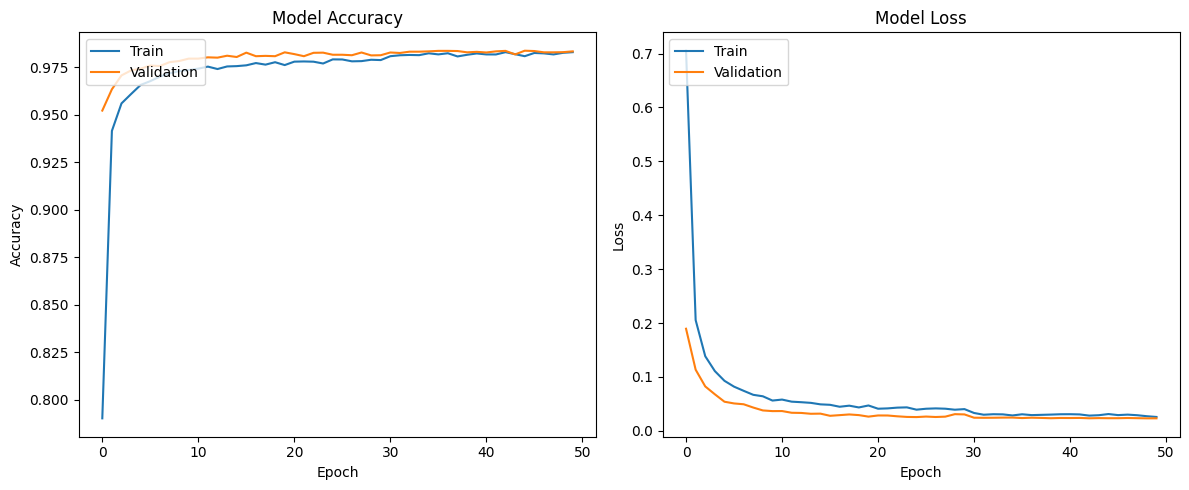

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()